<a href="https://colab.research.google.com/github/Kolbjornlindberg/FV-profile-Interpretation/blob/main/FV_profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Can We Objectively Define A “good” or “bad” FV-profile test?
In multi-joint movements, the FV-relationship (Force-Velocity) is commonly drawn using a linear regression line.
The r2-value of the regression line is commonly used to determine the quality of the fit. where 0.95 is previously recommended as a good fit.
However, the r2-value alone does not tell us much about the quality of the fit. for example, if we have few data points, the r2-value will be high, even if the fit is poor.
So first lets look at a few real world examples of FV-profiles, and see how the r2-value changes with the number of data points.
In this Notebook, we will use FV-profiles from a leg press machine (https://doi.org/10.1123/ijspp.2020-0954). The Analysis can be generalised to other movements as well.

In [2]:
import numpy as np
import pandas as pd
import os
import tabulate
from matplotlib import pyplot as plt

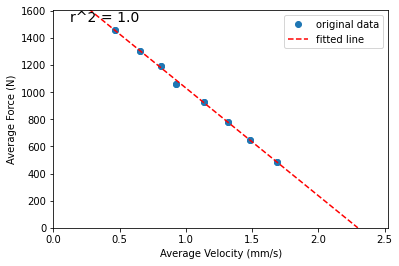

In [3]:
# here is the  1.69
x = [1.69, 1.4835, 1.3195, 1.1355, 0.928, 0.81, 0.652, 0.465]
y = [481.6, 647.8, 779.8, 927.9, 1061.7, 1194.1, 1306.9, 1457.1]

r2 = np.corrcoef(x, y)[0, 1] ** 2

# plot the data as a scatter plot
plt.scatter(x, y)
# x label = Averaged Velocity (mm/s)
plt.xlabel('Average Velocity (mm/s)')
# y label = Averaged Force (N)
plt.ylabel('Average Force (N)')

# draw a linear regression line through the data
plt.plot(x, y, 'o', label='original data')

## linear regression, extrapolate to 0
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# x2 is 0 to the intercep of 0 on the line
x2 = np.linspace(0, -p[0] / p[1], 10)

y2 = p(x2)
plt.plot(x2, y2, 'r--', label='fitted line')

# axis limit is 0 to 1.1 times the intercep of 0 on the line
plt.xlim(0, 1.1 * -p[0] / p[1])
plt.ylim(0, 1.1 * max(y))

# add the r^2 value to the plot
plt.text(0.05, 0.95, 'r^2 = ' + str(round(r2, 2)), transform=plt.gca().transAxes, fontsize=14)
plt.legend()
plt.show()
